In addition to the eight planets in the solar system, there are several dwarf planets. Examples are `Pluto (a = 39.48 AU)`, which was formerly considered as ninth planet, `Ceres (a = 2.7675 AU)` in the asteroid belt, and the trans-Neptunian object `Eris (a = 67.781 AU)`. 

Compute the corresponding orbital periods (the mass of the dwarf planets is negligible) and plot the results together with the orbital data of the planets using different markers and an additional label in the legend for the dwarf planets.

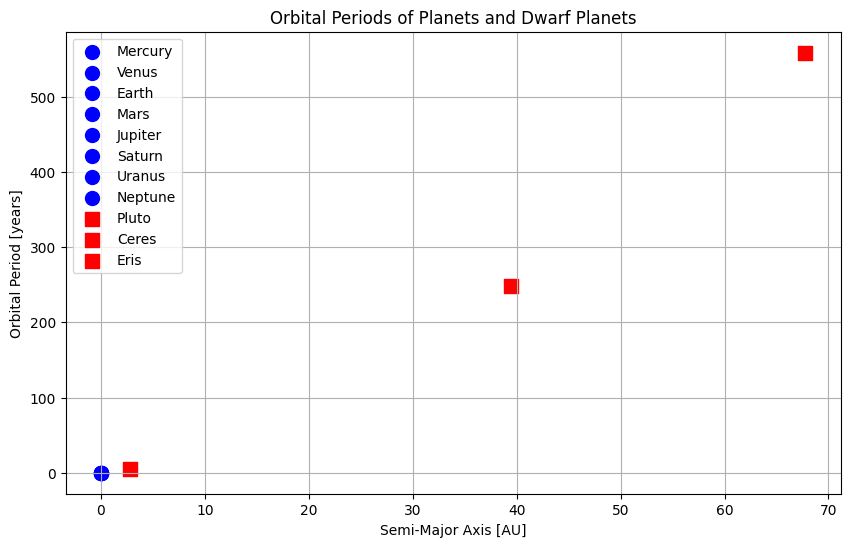

In [4]:
from astropy.constants import M_sun, au
from astropy.units import u
import numpy as np
import pandas as pd
from scipy.constants import year, G, hour
import matplotlib.pyplot as plt

M = M_sun.value

# Corrected labels to match planets and dwarf planets
labels = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto', 'Ceres', 'Eris']

# Masses of planets (in 10^24 kg)
mass_planet = np.array([0.33011, 4.8675, 5.9723, 0.64171, 1898.19, 568.34, 86.813, 102.413]) * 1e24  

# Semi-major axis in meters
a_planet = (np.array([57.9, 108.21, 149.60, 227.92, 778.57, 1433.53, 2872.46, 4495.06]) * 1e9 ) / au.value
a_dwarf = np.array([39.48, 2.7675, 67.781]) * au.value 

a_combined = np.concatenate([a_planet, a_dwarf])
# Orbital period in years
Period = (np.sqrt((4 * np.pi**2 * a_combined**3) / (G * M))) / year

# Markers and colors for plotting
markers = ['o'] * len(a_planet) + ['s'] * len(a_dwarf)
colors = ['b'] * len(a_planet) + ['r'] * len(a_dwarf)

# Construct data for DataFrame
data = []
for label, P, a in zip(labels, Period, a_combined):
    row = {
        'Planet': label,
        'Semi-major axis [AU]': a,  # Convert to AU for consistency
        'Period [years]': P
    }
    data.append(row)

dataframe = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(a_combined)):
    plt.scatter(a_combined[i] / au.value, Period[i], c=colors[i], marker=markers[i], label=labels[i] if i < len(labels) else "", s=100)

plt.xlabel('Semi-Major Axis [AU]')
plt.ylabel('Orbital Period [years]')
plt.title('Orbital Periods of Planets and Dwarf Planets')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Since the discovery of the first exoplanets (extrasolar planets) in the mid-nineties, many more have been identified. An important class are the so-called hot Jupiters. These objects have high mass, but unlike the gas giants in the solar system, they are much closer to their parent star. Typically, the orbital period of a hot Jupiter is only a few days (compared to almost twelve years for Jupiter in the solar system). Table 2.1 lists a sample of hot Jupiters discovered with the transient method. The planet mass is often a lower bound, as it depends on the unknown inclination of the orbit relative to the line of sight. 

(a) Compute the semi-major axis a in AU for these exoplanets using the planet mass m and the mass of the star M as parameters and plot the orbital period P versus a and plot your results.

(b) You can use the NumPy function `polyfit()` to determine a linear fit to the logarithmic data. Call `polyfit()` with the logarithm of P in days as first argument (x-data), the logarithm of a in AU as second argument (y-data), and degree of the polynomial function that is fitted to the data as third argument. Here, the degree is 1 for a linear function `y = c1x + c0`. `polyfit()` returns the fit parameters `c0` and `c1`. Compare to the logarithmic formulation (2.5) of Kepler’s third law. Why is the slope not exactly reproduced? Display the orbital period following from the fit as a line in the plot from (a).

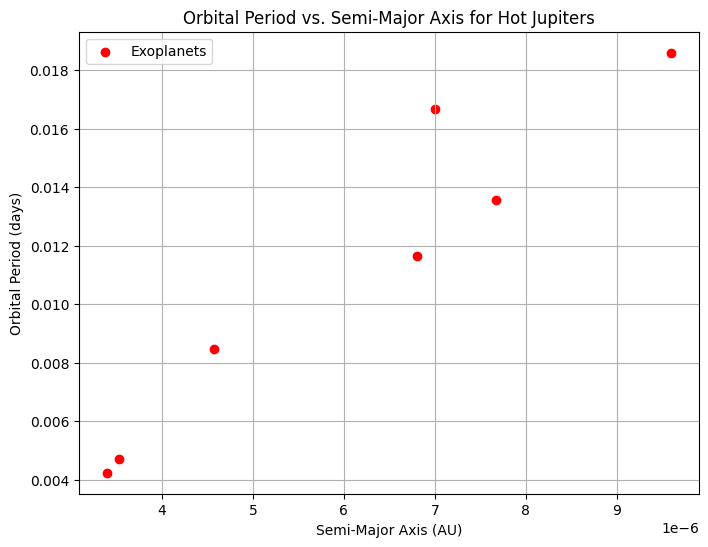

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.constants import G

P_year = np.array([4.257, 6.790, 1.721, 6.088, 3.093, 4.954, 1.549]) / 365.25 # Orbital periods in days

m = np.array([22, 8.4, 0.94, 0.92, 3.19, 0.56, 1.77])  # Planet masses in Jupiter masses
M = np.array([1.37, 1.51, 1.17, 0.73, 0.79, 1.45, 1.29])  # Stellar masses in Solar masses

#Kepler's Third Law
a_AU = ((G * M * P_year**2) / (4 * np.pi**2))**(1/3)

# Orbital Period vs. Semi-Major Axis Plot
plt.figure(figsize=(8, 6))
plt.scatter(a_AU, P_year, color='red', label='Exoplanets')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (days)')
plt.title('Orbital Period vs. Semi-Major Axis for Hot Jupiters')
plt.legend()
plt.grid(True)
plt.show()

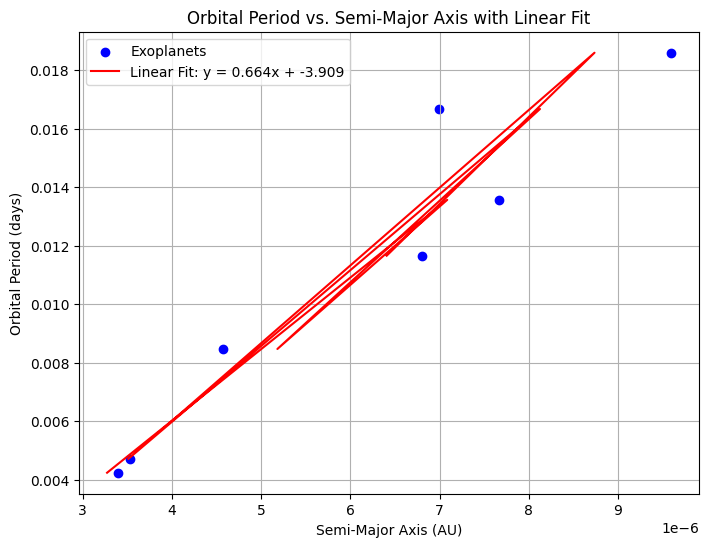

(0.6641975201020275, -3.9091045250764473)

In [6]:
log_P = np.log10(P_year)
log_a = np.log10(a_AU)

fit_params = np.polyfit(log_P, log_a, 1)
c1, c0 = fit_params

log_a_fit = c1 * log_P + c0
a_fit = 10**log_a_fit

plt.figure(figsize=(8, 6))
plt.scatter(a_AU, P_year, color='blue', label='Exoplanets')
plt.plot(a_fit, P_year, color='red', label=f'Linear Fit: y = {c1:.3f}x + {c0:.3f}')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (days)')
plt.title('Orbital Period vs. Semi-Major Axis with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

c1, c0
